<a href="https://colab.research.google.com/github/arunnagaraju/ML/blob/master/titanic_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preparing data**

***1. Removing unwanted columns***
Logically, following fields does not have any role in survival - PassengerId, Name, Embarked, Ticket, Fare

***2. Preparing Age***

Age is an important factor in survival. But unfortunately, the data contains lot of empty values for age both in training data and test data.

*Approach 1: Discard age with null values*
> Indented block
  This approach will not work because the test data also has null values for age.


*Approach 2: Use mean value for missing age *
> Indented block
compute mean age using both training data and test data and use that for age.

*Approach 3: Use mean value by grouping with sex*
> Indented block
  We group the values by sex and calculate the mean for each sex and substitute missing values with mean for that sex. Theoritically, this sounds better but in actual prediction, this approach did not yield any significant improvement.



In [2]:
import pandas as pd

import time
from sklearn import tree
import pydot
import math as math
import numpy as np 

train = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv")

def embarked(val): 
    if val=='C': 
        return 1
    elif val=='S':
        return 2
    elif val=='Q':
        return 3
    else: 
        return 0

def cabin(val):
  cabinval = 0
  if type(val)==str:
      floor = val[0]
      res = [int(i) for i in val[1:].split() if i.isdigit()] 
      loc = 0
      #if len(res) > 0:
      #   loc = int(res[0])
      cabinval = ord(floor)
      cabinval=cabinval*1000
      cabinval = cabinval + loc
  return cabinval

def getage(i):
  if (not math.isnan(i['Age'])):
    return i['Age']
  return agemean[(i['sex'])]

def gettestage(i):
  if (not math.isnan(i['Age'])):
    return i['Age']
  return testagemean[(i['sex'])]
  
#chainging strings to numerical value

result = test[['Name','PassengerId']]

train['sex'] = train["Sex"].apply(lambda x: 0 if x == "male" else 1)
test['sex'] = test["Sex"].apply(lambda x: 0 if x == "male" else 1)

train['embarked'] = train['Embarked'].apply(embarked)
test['embarked'] = test['Embarked'].apply(embarked)

train['cabin'] = train['Cabin'].apply(cabin)
test['cabin'] = test['Cabin'].apply(cabin)


#Age is an important factor but unfortuantely, the dataset contains empty values for age
#So we will fill it up with average age of the passengers. 

#average = train.mean(skipna=True, numeric_only=True, axis=0)
#average_age = average['Age'];
#train['age'] = train['Age'].apply(lambda x: x if ((type(x)== float or type(x)== int) and not math.isnan(x)) else average_age)
#test['age'] = test['Age'].apply(lambda x: x if ((type(x)== float or type(x)== int) and not math.isnan(x)) else average_age)

#instead of just finding average age, we will try to find average in sex hoping the result
# will be better than just plain average

agedata = train[['Age','sex']]
testagedata = test[['Age','sex']]

agedata.append(testagedata)
agemean = agedata.groupby(['sex'])
agemean = agemean['Age'].agg(np.mean)
print(agemean)
agemean = agemean.to_dict()

testagemean = testagedata.groupby(['sex'])
testagemean = testagemean['Age'].agg(np.mean)
print(testagemean)
testagemean = testagemean.to_dict()

#conclusion - it did not make any difference than average age
#there must be some other factor that contributes to the result

train['age'] = agedata.apply(getage,axis=1,)
test['age'] = testagedata.apply(getage,axis=1)

#dropping unwanted columns
train = train.drop(['Embarked','Cabin','Ticket','Sex','Name','PassengerId','Age','Fare','embarked'],axis=1)
test = test.drop(['Embarked','Cabin','Ticket','Sex','Name','PassengerId','Age','Fare','embarked'],axis=1)


#train = train.dropna()

x_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values
x_test = test.iloc[:,:].values

#clf = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=4, class_weight="balanced");
#clf = tree.DecisionTreeClassifier(min_samples_split=4, max_features="auto", max_leaf_nodes=20);

print (train)
print (test)



#test_scores = [clf.score(x_test, y_test) for clf in clfs]




sex
0    30.726645
1    27.915709
Name: Age, dtype: float64
sex
0    30.272732
1    30.272362
Name: Age, dtype: float64
     Survived  Pclass  SibSp  Parch  sex  cabin        age
0           0       3      1      0    0      0  22.000000
1           1       1      1      0    1  67000  38.000000
2           1       3      0      0    1      0  26.000000
3           1       1      1      0    1  67000  35.000000
4           0       3      0      0    0      0  35.000000
..        ...     ...    ...    ...  ...    ...        ...
886         0       2      0      0    0      0  27.000000
887         1       1      0      0    1  66000  19.000000
888         0       3      1      2    1      0  27.915709
889         1       1      0      0    0  67000  26.000000
890         0       3      0      0    0      0  32.000000

[891 rows x 7 columns]
     Pclass  SibSp  Parch  sex  cabin        age
0         3      0      0    0      0  34.500000
1         3      1      0    1      0  47.000000
2

**Visualising the data**

We need the following visual representation to understand the impact of feature on survival.

1. Role of gender in survival
2. Role of age in survival
3. Role of class in survival
4. Role of cabin in survival
5. Role of Parch in survival (parch = # of parents/children aboard)
6. Role of Sibling/Spouse in survival (sibsp = # of siblings / spouses aboard)

'\nfig = plt.figure(figsize=(18,6), dpi=1600) \nsgroup = train[[\'Survived\',\'sex\',\'Pclass\',\'age\']].groupby([\'sex\',pd.cut(train["age"], np.arange(0, 100+10, 10)),\'Pclass\']).mean()\nsgroup.dropna()\nsgroup = sgroup[sgroup[\'Survived\'].notnull()]\nprint(sgroup)\n\nplt.subplot2grid((20,2),(6,0),colspan=2, rowspan=5)\n# sets the y axis lable\nplt.ylabel("Survival Ratio")\nplt.xlabel("all factors except cabin")\nsgroup[\'Survived\'].plot(kind=\'bar\')\n# formats the grid line style of our graphs                          \nplt.grid(b=True, which=\'major\', axis=\'y\')  \nplt.title("Survival by all factors except cabin")\n\ncgroup = train[[\'Survived\',\'sex\',\'Pclass\',\'age\',\'cabin\']].groupby([\'sex\',pd.cut(train["age"], np.arange(0, 100+10, 10)),\'Pclass\',\'cabin\']).mean()\ncgroup.dropna()\nprint(cgroup)\ncgroup = cgroup[cgroup[\'Survived\'].notnull()]\nprint(cgroup)\n\n\nplt.subplot2grid((20,2),(12,0),colspan=2,rowspan=7)\n# sets the y axis lable\nplt.ylabel("Survival Ra

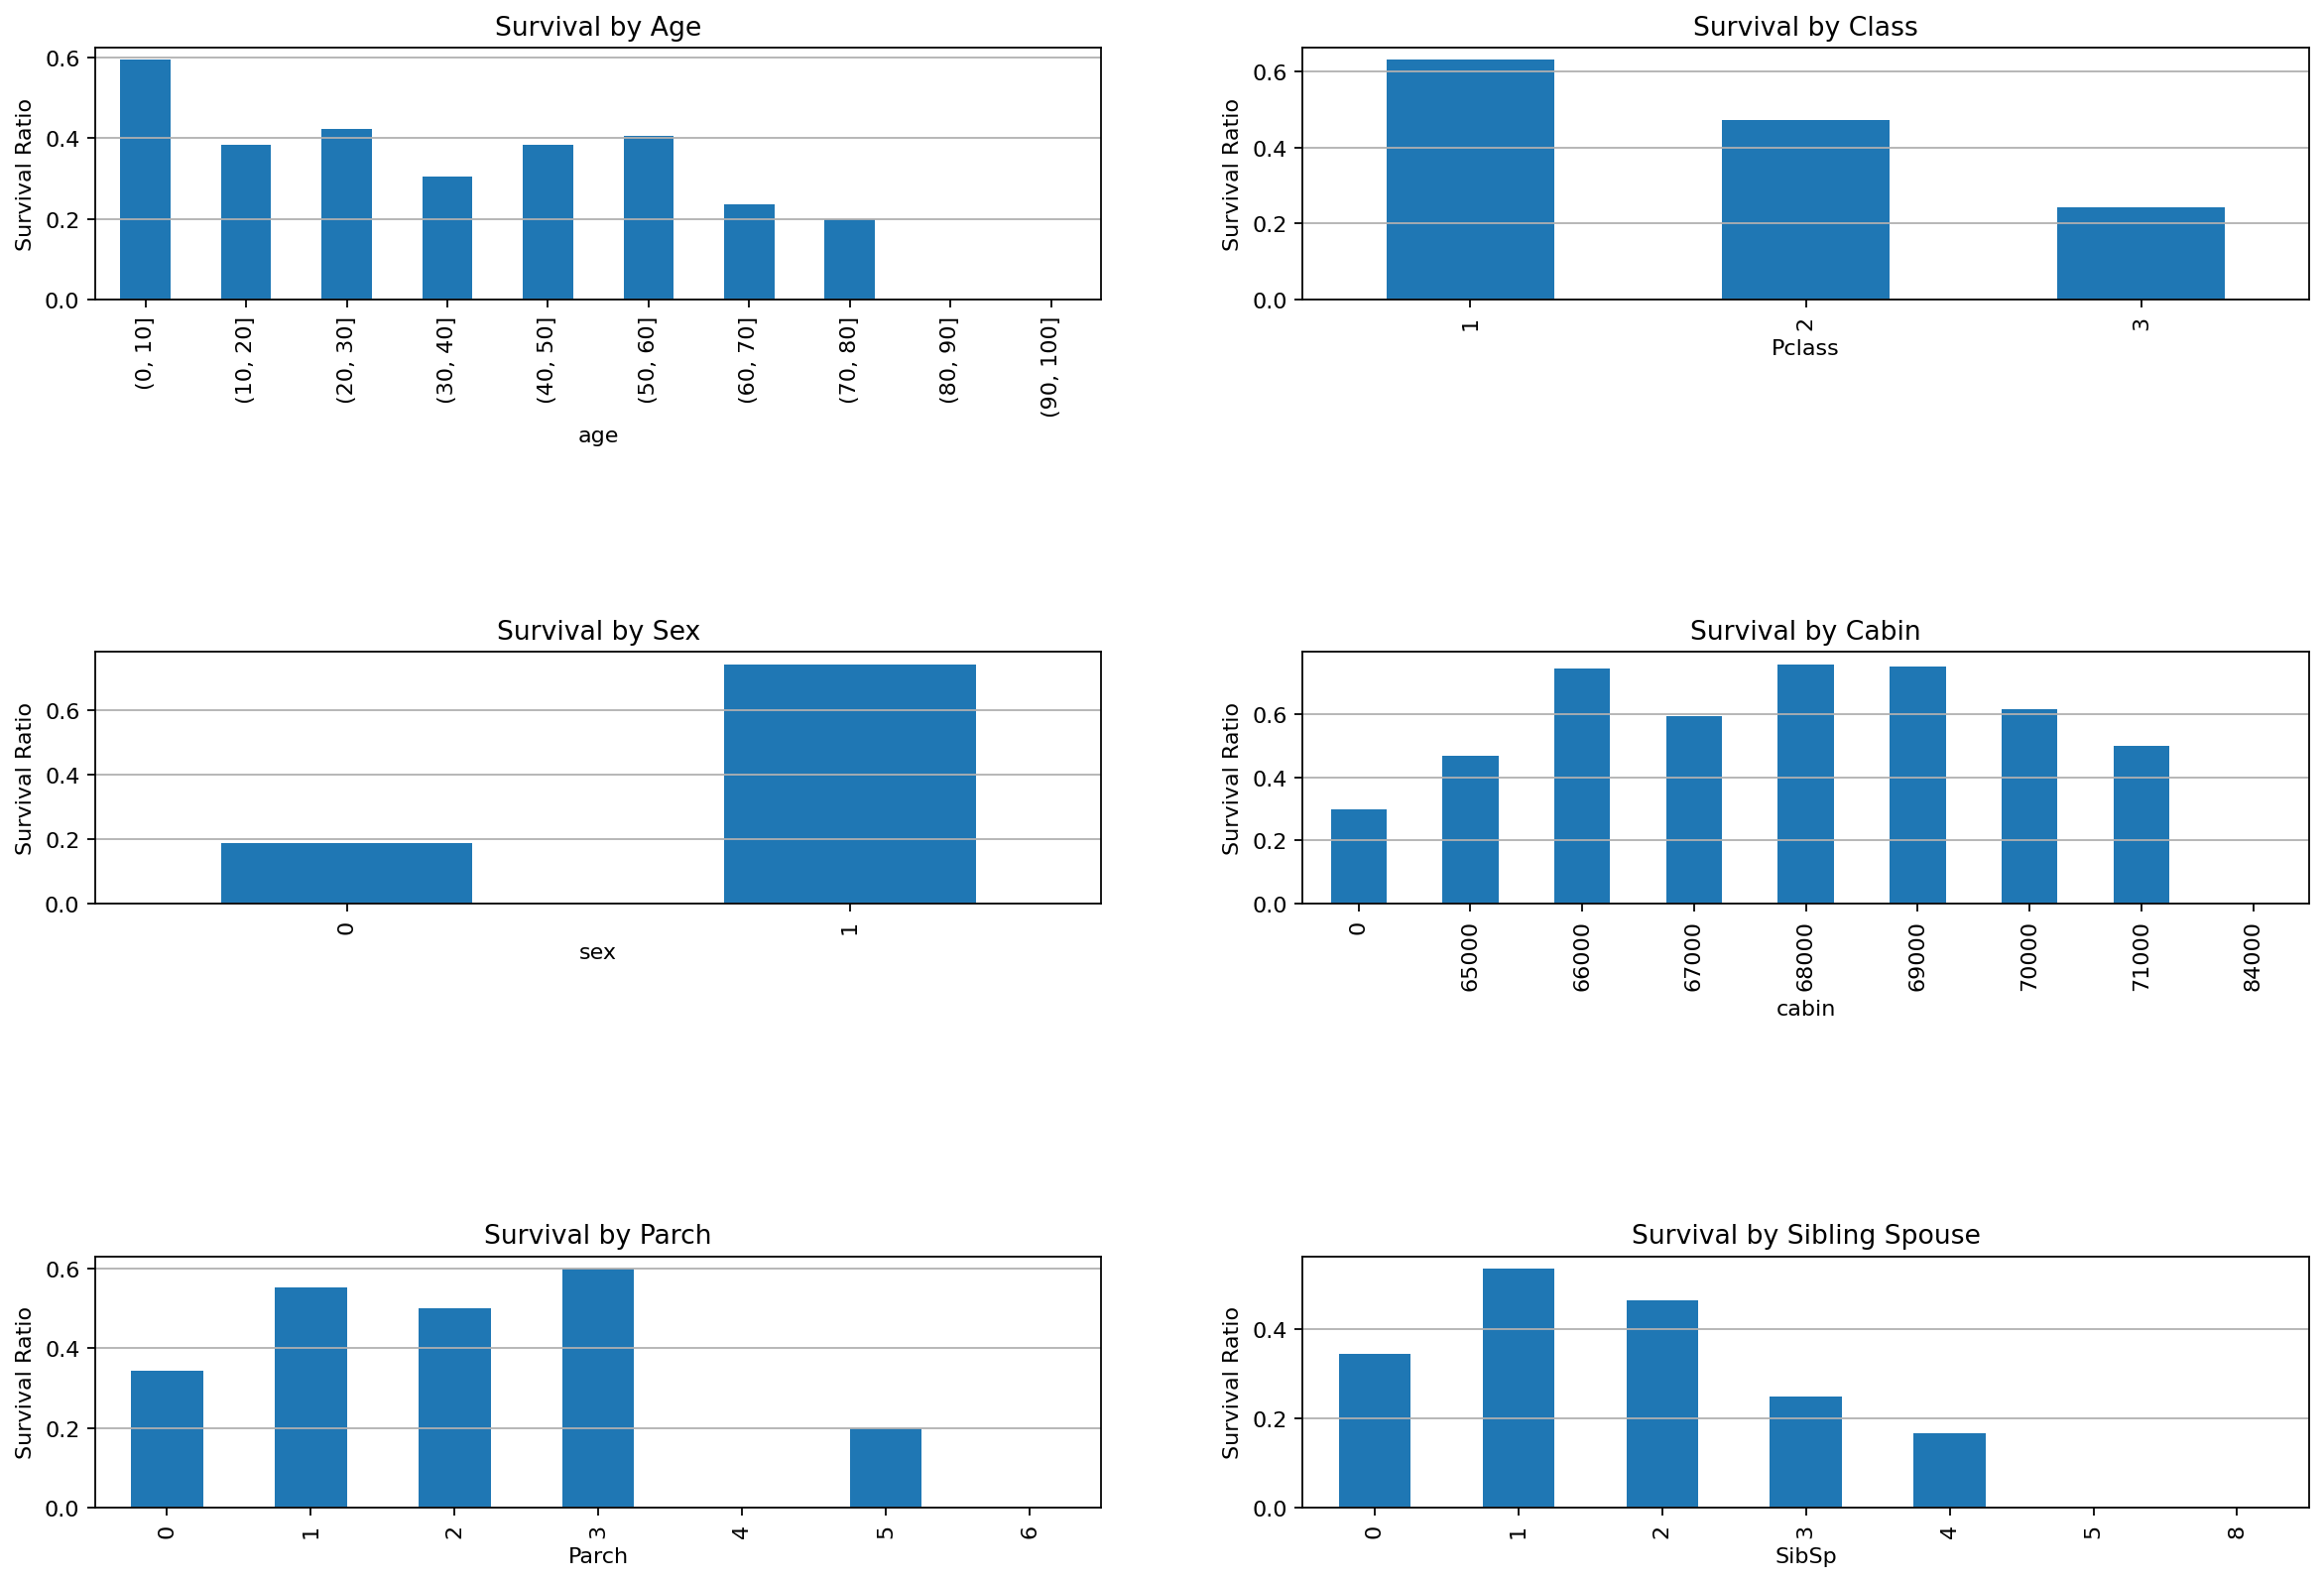

In [3]:
import matplotlib.pyplot as plt

# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,50), dpi=160) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

ageval = train[['Survived','age']].groupby(pd.cut(train["age"], np.arange(0, 100+10, 10))).mean()
ageval.dropna()
# sets the y axis lable
plt.subplot2grid((20,2),(0,0))
plt.ylabel("Survival Ratio")
plt.xlabel("Age")
ageval['Survived'].plot(kind='bar')
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age")

classval = train[['Survived','Pclass']].groupby("Pclass").mean()
classval.dropna()

plt.subplot2grid((20,2),(0,1))
# sets the y axis lable
plt.ylabel("Survival Ratio")
plt.xlabel("Class")
classval['Survived'].plot(kind='bar')
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Class")


genderval = train[['Survived','sex']].groupby("sex").mean()
genderval.dropna()

plt.subplot2grid((20,2),(2,0))
# sets the y axis lable
plt.ylabel("Survival Ratio")
plt.xlabel("Sex")
genderval['Survived'].plot(kind='bar')
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Sex")


cabinval = train[['Survived','cabin']].groupby("cabin").mean()
cabinval.dropna()

plt.subplot2grid((20,2),(2,1))
# sets the y axis lable
plt.ylabel("Survival Ratio")
plt.xlabel("Cabin")
cabinval['Survived'].plot(kind='bar')
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Cabin")

parchval = train[['Survived','Parch']].groupby("Parch").mean()
parchval.dropna()

plt.subplot2grid((20,2),(4,0))
# sets the y axis lable
plt.ylabel("Survival Ratio")
plt.xlabel("Parch")
parchval['Survived'].plot(kind='bar')
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Parch")

sval = train[['Survived','SibSp']].groupby("SibSp").mean()
sval.dropna()

plt.subplot2grid((20,2),(4,1))
# sets the y axis lable
plt.ylabel("Survival Ratio")
plt.xlabel("SibSp")
sval['Survived'].plot(kind='bar')
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Sibling Spouse")

"""
fig = plt.figure(figsize=(18,6), dpi=1600) 
sgroup = train[['Survived','sex','Pclass','age']].groupby(['sex',pd.cut(train["age"], np.arange(0, 100+10, 10)),'Pclass']).mean()
sgroup.dropna()
sgroup = sgroup[sgroup['Survived'].notnull()]
print(sgroup)

plt.subplot2grid((20,2),(6,0),colspan=2, rowspan=5)
# sets the y axis lable
plt.ylabel("Survival Ratio")
plt.xlabel("all factors except cabin")
sgroup['Survived'].plot(kind='bar')
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by all factors except cabin")

cgroup = train[['Survived','sex','Pclass','age','cabin']].groupby(['sex',pd.cut(train["age"], np.arange(0, 100+10, 10)),'Pclass','cabin']).mean()
cgroup.dropna()
print(cgroup)
cgroup = cgroup[cgroup['Survived'].notnull()]
print(cgroup)


plt.subplot2grid((20,2),(12,0),colspan=2,rowspan=7)
# sets the y axis lable
plt.ylabel("Survival Ratio")
plt.xlabel("all factors")
cgroup['Survived'].plot(kind='bar')
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by all factors")
"""

In [4]:
"""
train['sex1']=train['sex']
train['sex2']=train['sex']
test['sex1']=test['sex']
test['sex2']=test['sex']
"""

print(train.columns)
print(test.columns)

Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'sex', 'cabin', 'age'], dtype='object')
Index(['Pclass', 'SibSp', 'Parch', 'sex', 'cabin', 'age'], dtype='object')


**Keep self test data**

We will remove 25% of the train data to keep it as self test data. Then we can apply our prediction model to the known test data and validate our prediciton accuracy. 

We will prepare 10 sets of training and testing data and validate with our model

In [5]:
from numpy import random

x_train = []
y_train = []

x_train_test=[]
y_train_test=[]

def formtest():
  testindex=random.randint(len(train), size=(int(len(train)/4)))
  trainindex = []
  for i in range(0,len(train)):
    if i not in testindex:
      trainindex.append(i)

  x_train.append(train.iloc[trainindex,1:].values)
  y_train.append(train.iloc[trainindex,0].values)

  x_train_test.append(train.iloc[testindex,1:].values)
  y_train_test.append(train.iloc[testindex,0].values)

#form test data with 10 different combinations
for i in range(0,10):
    formtest()


**Pruning the data**

This logic was obtained from sklearns' decision tree pruning help page.

We check for the ccp_alpha values and try to visualize how many nodes and dept are present for each ccp_alpha values. Then we use optimal ccp_alpha for preparing out model

We are building a forest with best ccp_alpha values for each tree params. We are storing the forest in bestclfs

In [6]:
import pandas as pd
scores=[]
scoreparams=[]


def find_optimal(clf, name, balanced):
  global bestclfs
  global scores
  global scoreparams

  clf = clf.fit(x_train[0], y_train[0])
  path = clf.cost_complexity_pruning_path(x_train[0], y_train[0])
  ccp_alphas, impurities = path.ccp_alphas, path.impurities

  """
  fig, ax = plt.subplots()
  ax.plot(ccp_alphas[:-3], impurities[:-3], marker='o', drawstyle="steps-post")
  ax.set_xlabel("effective alpha")
  ax.set_ylabel("total impurity of leaves")
  ax.set_title("Total Impurity vs effective alpha for training set")
  plt.show()
  """
  clfs = []
  node_counts = []
  depth = []
  train_scores=[]
  test_scores=[]
  train_params=[]
  path = clf.cost_complexity_pruning_path(x_train[0], y_train[0])
  ccp_alphas, impurities = path.ccp_alphas, path.impurities
  ccp_alphas = [x for x in ccp_alphas if x > 0.0]
  for ccp_alpha in ccp_alphas:
      _train_scores=[]
      _test_scores=[]
      if ccp_alpha > 0:
        params = clf.get_params()
        params['ccp_alpha']=ccp_alpha
        c=tree.DecisionTreeClassifier()
        c.set_params(**params)
        for i in range(0,10):
            c.fit(x_train[i], y_train[i])
            clfs.append(c)
            _train_scores.append(c.score(x_train[i], y_train[i]))
            _test_scores.append(c.score(x_train_test[i], y_train_test[i]))

        """
        fig, ax = plt.subplots(figsize=(24,6))
        ax.set_xlabel("iteration")
        ax.set_ylabel("accuracy")
        ax.set_title("Accuracy vs alpha "+str(ccp_alpha) + "train = "+str(sum(_train_scores)/len(_train_scores)) + ", test = "+str(sum(_test_scores)/len(_test_scores)))
        ax.plot(range(0,10), _train_scores, 'go-', label="train",
                drawstyle="steps-post")
        ax.plot(range(0,10), _test_scores, 'ro-', label="test",
                drawstyle="steps-post")
        ax.legend()
        """
        train_scores.append(sum(_train_scores)/len(_train_scores))
        scores.append(sum(_test_scores)/len(_test_scores))
        scoreparams.append(params);
  
  """
  params=[[]]
  best_score.append(max_score)
  max_score = max(test_scores)
  for i in range(0,len(test_scores)):
      if test_scores[i]==max_score:
        params.append(train_params[i])
  """
  """ 
  c=tree.DecisionTreeClassifier()
  c.set_params(**params)
  bestclfs.append(c)
  print("Best ccp alphas for score ",max_score)
  for p in best_params:
    print("    - ",p)
  """
  """
  if(abs(max_score - best_max_score)>=0.05 or max_score > best_max_score):
    print("classifier using - ", name)
    if((max_score - best_max_score) > 0.05):
      del bestclfs
      bestclfs=[]
      best_max_score = max_score
    for params in best_params:
      print("Best ccp alphas for score ",max_score, " - ",params)
      c=tree.DecisionTreeClassifier()
      c.set_params(**params)
      bestclfs.append(c)
  """

  #bestclfs.append({'score':best_max_score,'params':best_params})
  
  """
  fig, ax = plt.subplots(figsize=(24,10))
  ax.set_xlabel("alpha")
  ax.set_ylabel("accuracy")
  ax.set_title("Accuracy vs alpha for training and testing sets")
  ax.plot(ccp_alphas[:-4], train_scores[:-4], marker='o', label="train",
          drawstyle="steps-post")
  ax.plot(ccp_alphas[:-4], test_scores[:-4], marker='o', label="test",
          drawstyle="steps-post")
  ax.legend()
  plt.show()

  fig, ax = plt.subplots(2, 1)
  ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
  ax[0].set_xlabel("alpha")
  ax[0].set_ylabel("number of nodes")
  ax[0].set_title("Number of nodes vs alpha -"+name)
  ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
  ax[1].set_xlabel("alpha")
  ax[1].set_ylabel("depth of tree")
  ax[1].set_title("Depth vs alpha -"+ name)
  fig.tight_layout()
  """

for i in range(0,100):
  clf = tree.DecisionTreeClassifier(random_state=i*i*i, class_weight="balanced");
  find_optimal(clf,"balanced "+str(i),True)

for i in range(0,100):
  clf = tree.DecisionTreeClassifier(random_state=i*i*i,  max_features="auto");
  find_optimal(clf,"auto"+str(i),False)

for i in range(0,100):
  clf = tree.DecisionTreeClassifier(random_state=i*i*i,  max_leaf_nodes=200);
  find_optimal(clf,"max leaf nodes "+str(i),False)

for i in range(0,100):
  clf = tree.DecisionTreeClassifier( random_state=i*i*i, max_features="auto",class_weight="balanced");
  find_optimal(clf,"auto balanced"+str(i),False)

for i in range(0,100):
  clf = tree.DecisionTreeClassifier( random_state=i*i*i, max_features="log2");
  find_optimal(clf,"log2"+str(i),False)

for i in range(0,100):
  clf = tree.DecisionTreeClassifier( random_state=i*i*i, max_features="log2",class_weight="balanced");
  find_optimal(clf,"log2 balanced "+str(i),False)




**Pick the best parameters**

Pick top 100 decision tree parameters for prediction

In [7]:
import pandas as pd
bestclfs = pd.DataFrame()

bestclfs['scores']=scores
bestclfs['params']=scoreparams

#take the best 100 clf
bestclfs = bestclfs.sort_values(by=['scores'],ascending=0)
print(bestclfs.head(10))
print(bestclfs.tail(10))
bestclfs = bestclfs.head(100)
print(bestclfs.head(10))

         scores                                             params
14601  0.825676  {'ccp_alpha': 0.0016183331467174262, 'class_we...
17731  0.825676  {'ccp_alpha': 0.0016183331467174262, 'class_we...
18910  0.825676  {'ccp_alpha': 0.0016183331467174262, 'class_we...
14600  0.825676  {'ccp_alpha': 0.0015823376991349158, 'class_we...
14184  0.825676  {'ccp_alpha': 0.0016183331467174262, 'class_we...
20166  0.825676  {'ccp_alpha': 0.0016183331467174262, 'class_we...
14461  0.825676  {'ccp_alpha': 0.0016183331467174262, 'class_we...
17730  0.825676  {'ccp_alpha': 0.0015823376991349158, 'class_we...
18909  0.825676  {'ccp_alpha': 0.0015823376991349158, 'class_we...
16829  0.825676  {'ccp_alpha': 0.0016183331467174262, 'class_we...
         scores                                             params
23579  0.486486  {'ccp_alpha': 0.05304893864469388, 'class_weig...
26094  0.486486  {'ccp_alpha': 0.05080721503030061, 'class_weig...
34805  0.486486  {'ccp_alpha': 0.05080721503030061, 'class_wei

**Prediction**

We execute the forest that was prepared in the above step. We are also building a forest 5 items with fixed ccp_alpha and comparing it with our best forest model just to understand how the forest optimization is making a difference if any.

In [8]:
x_train = train.iloc[:,1:].values
y_train = train.iloc[:,0].values

y_predicts = pd.DataFrame()
print(len(bestclfs))
for i in range(0,len(bestclfs)):
  params = bestclfs.iloc[i,1]
  print(params)
  clf = tree.DecisionTreeClassifier()
  clf.set_params(**params)
  clf.fit(x_train, y_train)
  y_predicts[str(i)] = clf.predict(x_test);

  """
  features = train.columns
  importances = bestclfs[i].feature_importances_
  indices = np.argsort(importances)

  plt.title('Feature Importances')
  plt.barh(range(len(indices)), importances[indices], color='b', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')
  plt.show()  
  """  

y_predicts1 = pd.DataFrame()
for i in range(0,50):
  clf = tree.DecisionTreeClassifier(ccp_alpha=0.003, class_weight="balanced")
  clf.fit(x_train, y_train)
  y_predicts1[str(i)] = clf.predict(x_test);
  clf = tree.DecisionTreeClassifier(ccp_alpha=0.0025, class_weight="balanced")
  clf.fit(x_train, y_train)
  y_predicts1[str(i)+"a"] = clf.predict(x_test);
  clf = tree.DecisionTreeClassifier(ccp_alpha=0.002, class_weight="balanced")
  clf.fit(x_train, y_train)
  y_predicts1[str(i)+"b"] = clf.predict(x_test);

print(y_predicts)
y_predict = y_predicts.mean(axis=1)
y_predict = y_predict.apply(lambda x: 1 if x>0.5 else 0)

y_predict1 = y_predicts1.mean(axis=1)
y_predict1 = y_predict1.apply(lambda x: 1 if x>0.5 else 0)


print("")
print("")
print("prediction difference for ccp_alpha == 0.002")
print("")
for i in range(0,len(y_predict)):
  if y_predict[i] != y_predict1[i]:
    print("index ",i," is different:",y_predict[i],",",y_predict1[i])

result["Survived"]=y_predict;

print(result);

result[['PassengerId','Survived']].to_csv('result.csv',index=False)

100
{'ccp_alpha': 0.0016183331467174262, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 200, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 343, 'splitter': 'best'}
{'ccp_alpha': 0.0016183331467174262, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 200, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 140608, 'splitter': 'best'}
{'ccp_alpha': 0.0016183331467174262, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 200, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'dep

**Result**

The result without forest and with forest has an accuracy difference of 